# Import Library dan Load Data


In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Setting style visual
sns.set(style="whitegrid")

In [3]:
# Load Data
cp = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO DOKU /master_campaign.csv')
trx = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO DOKU /master_trx_campaign.csv')

/tmp/ipython-input-3-1312063222.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trx = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO DOKU /master_trx_campaign.csv')


In [4]:
# Lihat beberapa baris pertama
print("Campaign Data:")
display(cp.head(10))

print("Transaction Data:")
display(trx.head(10))

Campaign Data:


,Campaign ID,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,"1,000","June 21, 2023, 00:00","June 30, 2023, 23:59",9 days
5,825,CEBAN,TAGIHANCEBANFEB2,"1,488","1,500","January 25, 2023, 00:00","February 10, 2023, 23:59",16 days
6,265,DOKU TARQ DATA,DOKUTARQDATA,0,20,"October 20, 2017, 00:00","November 5, 2017, 23:59",16 days
7,44,TEST EVI,EVI2,1,15,"February 9, 2016, 00:00","February 10, 2016, 23:59",1 days
8,481,DOKU CEBAN,CEBANTAGIHAN3,245,500,"March 25, 2019, 00:00","April 10, 2019, 23:59",16 days
9,57,Test XL 3,LONDON25,0,6,"March 14, 2016, 00:00","March 15, 2016, 23:59",1 days


Transaction Data:


,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt
0,901,1356,Other,"February 25, 2024, 00:00",NaN,F,NaN,NaN,40000.0,5302326,1
1,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717349,1
2,902,1308,Other,"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4917609,1
3,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717429,1
4,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4717437,1
5,901,1356,Other,"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,5085100,1
6,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,F,NaN,NaN,40000.0,5415534,1
7,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4717443,1
8,901,1356,Other,"February 25, 2024, 00:02",47.0,M,Kab. Gresik,Perikanan,40000.0,5653695,1
9,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4917609,1


In [5]:
# Cek info
print("Campaign Info:")
cp.info()

print("\nTransaction Info:")
trx.info()

Campaign Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign ID          819 non-null    int64 
 1   Campaign Name        819 non-null    object
 2   Campaign Code        818 non-null    object
 3   Code Used            819 non-null    object
 4   Code Quota           819 non-null    object
 5   Campaign Start Date  819 non-null    object
 6   Campaign End Date    819 non-null    object
 7   Promo Duration       819 non-null    object
dtypes: int64(1), object(7)
memory usage: 51.3+ KB

Transaction Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153788 entries, 0 to 153787
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             153788 non-null  int64  
 1   merchant_name           153788 non-null  in

# Data Preprocessing

In [6]:
# Mengubah tipe data cust age ke int
trx['cust_age'] = trx['cust_age'].astype(str).str.extract(r'(\d+)')
trx['cust_age'] = trx['cust_age'].fillna(0).astype(int)



In [7]:
# mengubah tipe data code used dan code quota menjadi INT
cp['Code Used'] = cp['Code Used'].astype(str).str.replace(',', '').fillna(0).astype(int)
cp['Code Quota'] = cp['Code Quota'].astype(str).str.replace(',', '').fillna(0).astype(int)


In [8]:
cp['Campaign Start Date'] = pd.to_datetime(cp['Campaign Start Date'], errors='coerce')
cp['Campaign End Date'] = pd.to_datetime(cp['Campaign End Date'], errors='coerce')


In [9]:
# Rename kolom
cp = cp.rename(columns={
    'Campaign ID': 'campaign_id',
    'Campaign Name': 'campaign_name',
    'Code Used': 'code_used',
    'Code Quota': 'code_quota',
    'Campaign Start Date': 'campaign_start_date',
    'Campaign End Date': 'campaign_end_date',
    'Promo Duration' : 'promo_duration'
})


In [10]:
# Cek info
print("Campaign Info:")
cp.info()


Campaign Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   campaign_id          819 non-null    int64         
 1   campaign_name        819 non-null    object        
 2   Campaign Code        818 non-null    object        
 3   code_used            819 non-null    int64         
 4   code_quota           819 non-null    int64         
 5   campaign_start_date  818 non-null    datetime64[ns]
 6   campaign_end_date    818 non-null    datetime64[ns]
 7   promo_duration       819 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 51.3+ KB


In [11]:
print("\nTransaction Info:")
trx.info()


Transaction Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153788 entries, 0 to 153787
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             153788 non-null  int64  
 1   merchant_name           153788 non-null  int64  
 2   merchant_category_name  153788 non-null  object 
 3   transactions_datetime   153788 non-null  object 
 4   cust_age                153788 non-null  int64  
 5   gender                  153262 non-null  object 
 6   city                    6264 non-null    object 
 7   job                     12631 non-null   object 
 8   paid_amount             153788 non-null  float64
 9   customer_name           153788 non-null  int64  
 10  tpt                     153788 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 12.9+ MB


In [12]:
print(len(cp))

819


In [13]:
print(len(trx))

153788


In [14]:
# Cek info
print("Campaign Info:")
cp.info()

Campaign Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   campaign_id          819 non-null    int64         
 1   campaign_name        819 non-null    object        
 2   Campaign Code        818 non-null    object        
 3   code_used            819 non-null    int64         
 4   code_quota           819 non-null    int64         
 5   campaign_start_date  818 non-null    datetime64[ns]
 6   campaign_end_date    818 non-null    datetime64[ns]
 7   promo_duration       819 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 51.3+ KB


In [15]:
# Cek missing values
print("\nMissing Value - Campaign:")
print(cp.isnull().sum())

print("\nMissing Value - Transaction:")
print(trx.isnull().sum())


Missing Value - Campaign:
campaign_id            0
campaign_name          0
Campaign Code          1
code_used              0
code_quota             0
campaign_start_date    1
campaign_end_date      1
promo_duration         0
dtype: int64

Missing Value - Transaction:
campaign_id                    0
merchant_name                  0
merchant_category_name         0
transactions_datetime          0
cust_age                       0
gender                       526
city                      147524
job                       141157
paid_amount                    0
customer_name                  0
tpt                            0
dtype: int64


Meengubah tipe data transaction_datetime menjadi datetime dan memfilter data transaksi 2021 hingga 2024

In [16]:
# kolom tanggal bertipe datetime
trx['transactions_datetime'] = pd.to_datetime(trx['transactions_datetime'], errors='coerce')

# Filter tahun 2021-2024
trx_filtered = trx[ (trx['transactions_datetime'].dt.year >= 2021) & (trx['transactions_datetime'].dt.year <= 2024) ].copy()

print("Filtered Data Shape:", trx_filtered.shape)

Filtered Data Shape: (108623, 11)


Membuat Kolom is premium untuk mengetahui customer premium berdasarkan data customer lengkap

In [17]:
# Buat kolom is_premium
trx_filtered['is_premium'] = np.where(
    trx_filtered[['city', 'job', 'cust_age']].notnull().all(axis=1), 'Premium', 'Non-Premium'
)

# Cek distribusi
trx_filtered['is_premium'].value_counts()

,count
is_premium,
Non-Premium,107060
Premium,1563


Text(0.5, 1.0, 'Box plot of paid_amount')

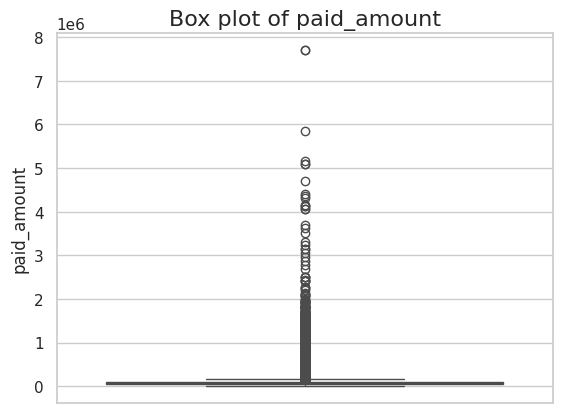

In [18]:
sns.boxplot(y=trx['paid_amount']).set_title('Box plot of paid_amount', size=16)

# EDA


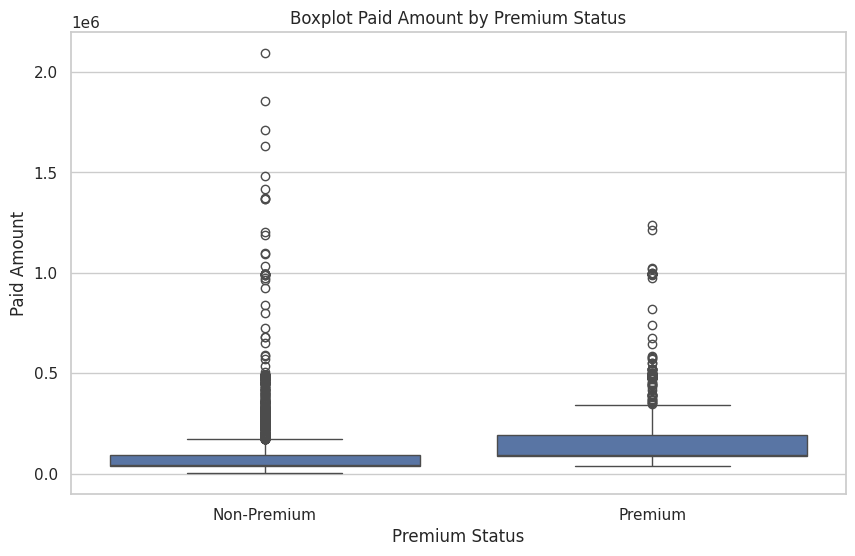

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=trx_filtered, x='is_premium', y='paid_amount')
plt.title('Boxplot Paid Amount by Premium Status')
plt.xlabel('Premium Status')
plt.ylabel('Paid Amount')
plt.show()

In [20]:
trx_join = trx_filtered.merge(cp[['campaign_id', 'campaign_name']], left_on='campaign_id', right_on='campaign_id', how='left')

/tmp/ipython-input-21-4244742844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trx_per_campaign.head(10), x='campaign_name', y='jumlah_transaksi', palette='Blues_d')


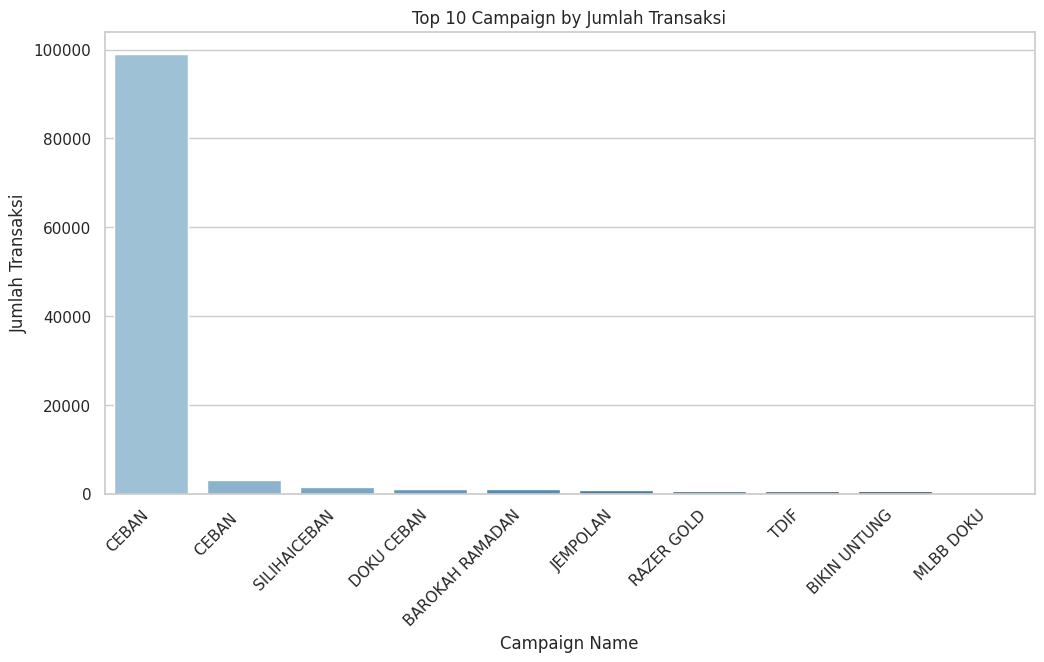

In [21]:
#  Jumlah transaksi per campaign
trx_per_campaign = trx_join.groupby('campaign_name').size().reset_index(name='jumlah_transaksi')
trx_per_campaign = trx_per_campaign.sort_values('jumlah_transaksi', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=trx_per_campaign.head(10), x='campaign_name', y='jumlah_transaksi', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Campaign by Jumlah Transaksi')
plt.xlabel('Campaign Name')
plt.ylabel('Jumlah Transaksi')
plt.show()

- Campaign “CEBAN” mendominasi dengan 99,1 ribu transaksi, jauh di atas lainnya.

- Campaign lain (CEBAN, SILIHAICEBAN, DOKU CEBAN, BAROKAH RAMADAN) masih memiliki potensi untuk ditingkatkan.





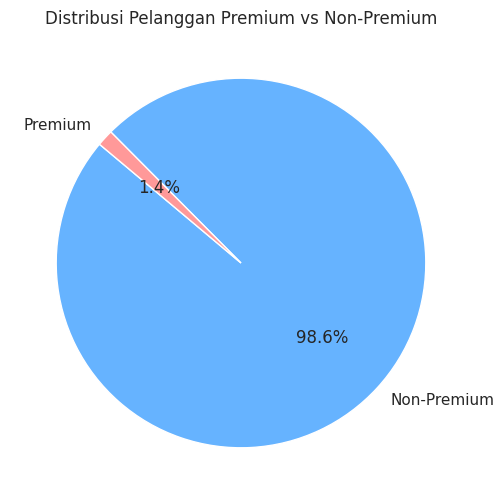

In [22]:
# Premium vs Non-Premium
premium_counts = trx_join['is_premium'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(premium_counts, labels=premium_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribusi Pelanggan Premium vs Non-Premium')
plt.show()

- Meningkatkan konversi ke pengguna premium.

- Menyesuaikan campaign agar tetap relevan bagi segmen non-premium.



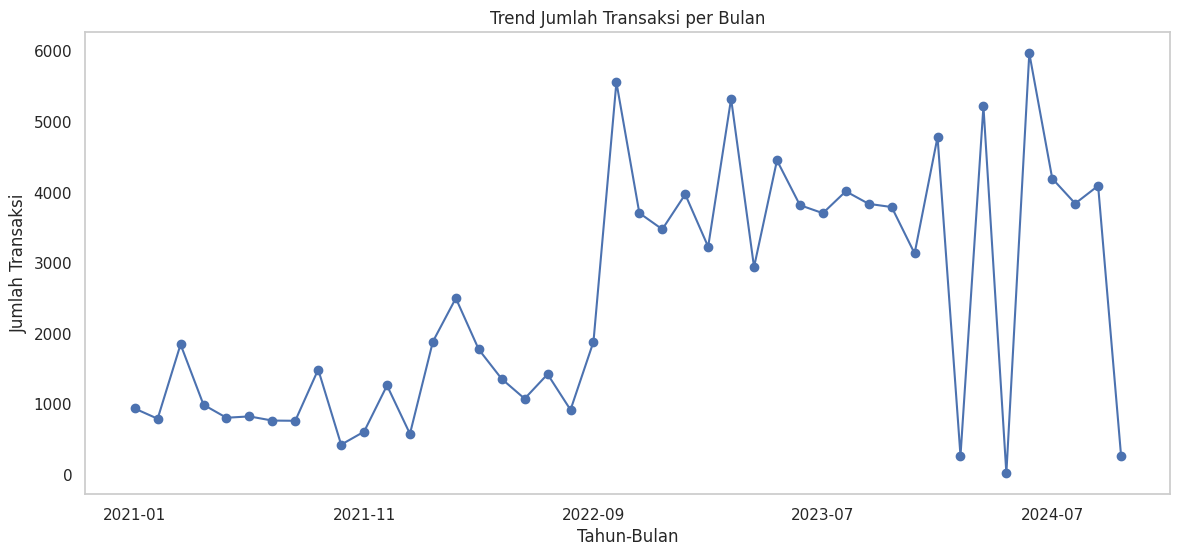

In [23]:
# Tren transaksi per bulan
trx_join['year_month'] = trx_join['transactions_datetime'].dt.to_period('M').astype(str)


monthly_trx = trx_join.groupby('year_month').size()

plt.figure(figsize=(14,6))
monthly_trx.plot(marker='o')
plt.title('Trend Jumlah Transaksi per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Transaksi')
plt.grid()
plt.show()

- Puncak tertinggi terjadi pada Mei 2024 (11,7 rb transaksi) yang kemungkinan terkait dengan momen Ramadhan/lebaran.

- Strategi kampanye berbasis momen spesial cukup efektif dan bisa dioptimalkan di bulan-bulan tertentu.



/tmp/ipython-input-24-781811545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trx_category.head(10), x='merchant_category_name', y='jumlah_transaksi', palette='Greens_d')


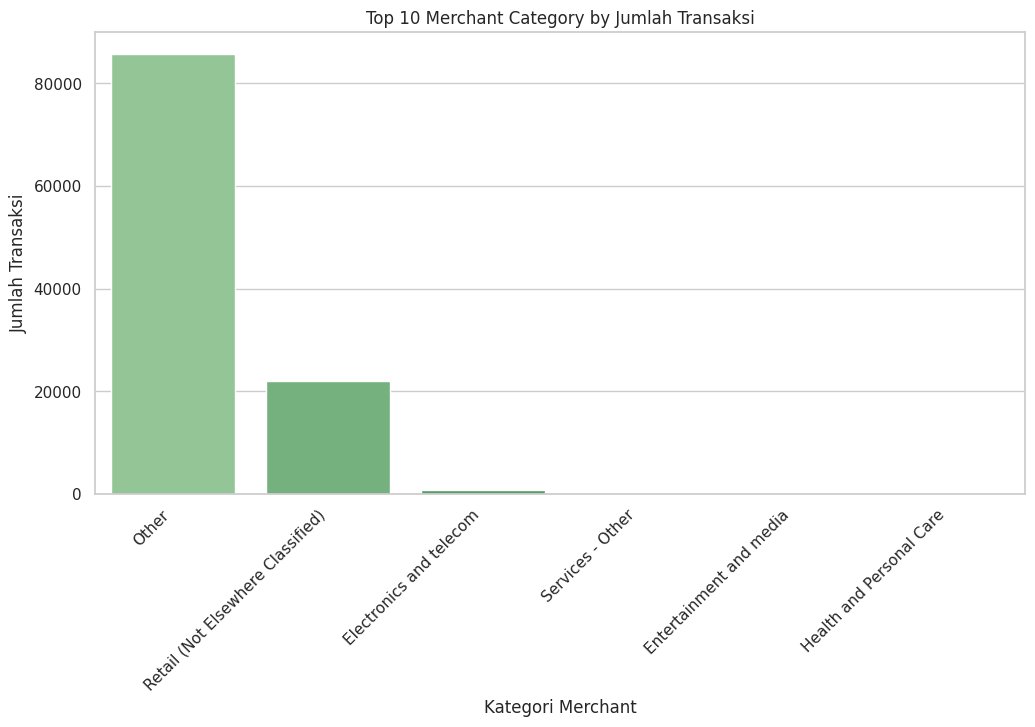

In [24]:
# Volume transaksi per kategori merchant
trx_category = trx_join.groupby('merchant_category_name').size().reset_index(name='jumlah_transaksi')
trx_category = trx_category.sort_values('jumlah_transaksi', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=trx_category.head(10), x='merchant_category_name', y='jumlah_transaksi', palette='Greens_d')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Merchant Category by Jumlah Transaksi')
plt.xlabel('Kategori Merchant')
plt.ylabel('Jumlah Transaksi')
plt.show()

/tmp/ipython-input-25-1617730906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trx_revenue_merchant.head(10), x='merchant_name', y='total_revenue', palette='Oranges_d')


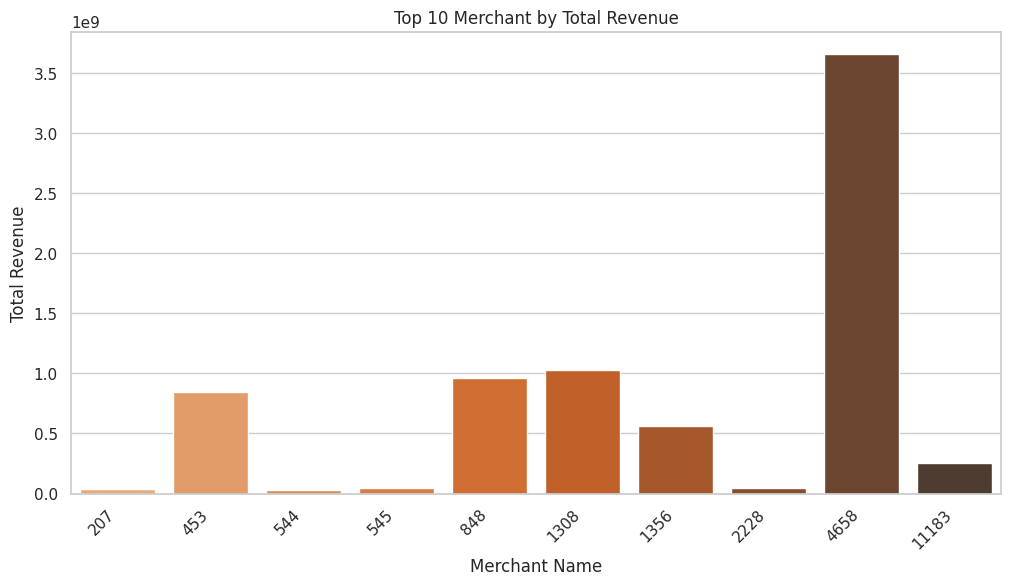

In [25]:
# Total revenue per merchant
trx_revenue_merchant = trx_join.groupby('merchant_name')['paid_amount'].sum().reset_index(name='total_revenue')
trx_revenue_merchant = trx_revenue_merchant.sort_values('total_revenue', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=trx_revenue_merchant.head(10), x='merchant_name', y='total_revenue', palette='Oranges_d')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Merchant by Total Revenue')
plt.xlabel('Merchant Name')
plt.ylabel('Total Revenue')
plt.show()

- Merchant 4658 menyumbang pendapatan tertinggi (~Rp3,7 M), jauh di atas merchant lainnya.

- Ada kesenjangan signifikan antara merchant-merchant top, menandakan hanya sebagian kecil merchant yang menyumbang mayoritas pendapatan.

- Fokus bisa diberikan pada merchant high performer dan replikasi strategi mereka ke merchant lain.

<Figure size 1200x700 with 0 Axes>

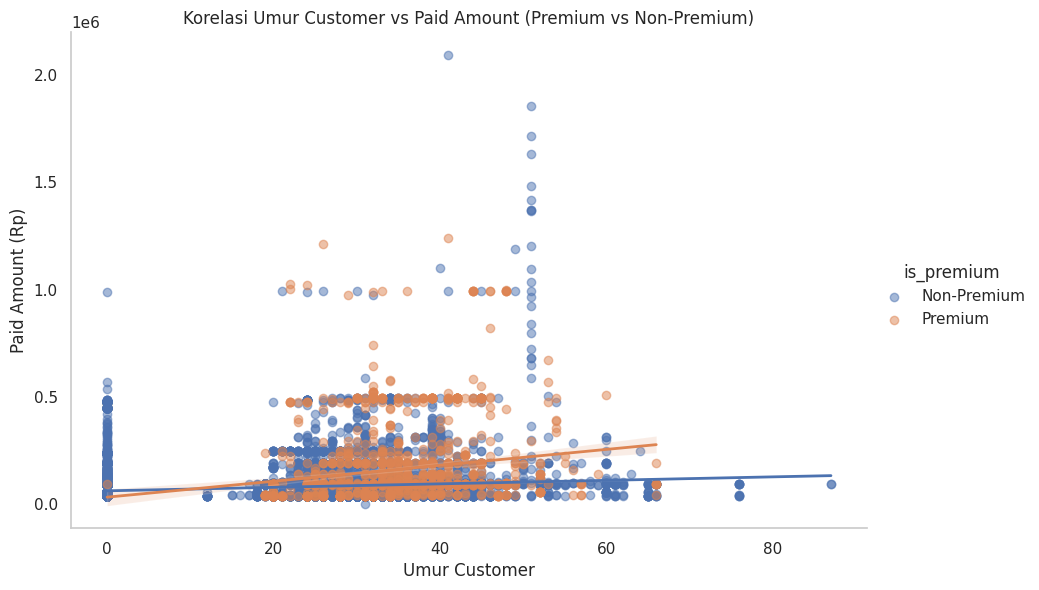

In [32]:
# # Korelasi cust age vs paid amount
plt.figure(figsize=(12,7))
sns.lmplot(data=trx_filtered, x='cust_age', y='paid_amount', hue='is_premium',
           height=6, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})

plt.title('Korelasi Umur Customer vs Paid Amount (Premium vs Non-Premium)')
plt.xlabel('Umur Customer')
plt.ylabel('Paid Amount (Rp)')
plt.grid()
plt.show()

- Pelanggan premium (warna oranye) umumnya memiliki nilai transaksi (paid amount) yang lebih tinggi daripada non-premium.

- Tidak terlihat korelasi kuat antara umur dan jumlah pembayaran — garis tren mendatar menunjukkan hubungan yang lemah.

- Terdapat outlier: pelanggan usia muda dan paruh baya dengan transaksi sangat tinggi.

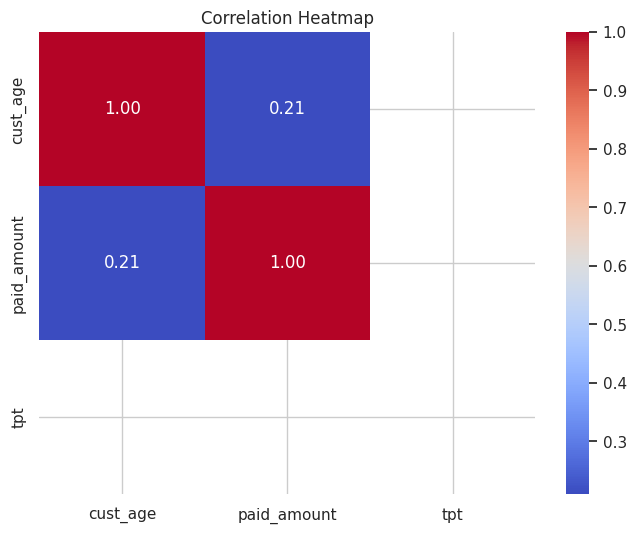

In [28]:
# Correlation Heatmap
corr = trx[['cust_age', 'paid_amount', 'tpt']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


- Korelasi antara umur customer dan paid amount adalah 0.21, artinya hubungan lemah positif — makin tua sedikit cenderung membayar lebih, tapi tidak signifikan.

- Korelasi antar variabel lainnya juga rendah, menandakan bahwa umur, paid amount, dan tpt (mungkin total transaksi per transaksi?) tidak saling mempengaruhi secara kuat.

In [29]:
cp.to_csv('master_campaign_clean.csv', index=False)


In [30]:
trx_join.to_csv('master_trx_join_campaign_clean.csv', index=False)


In [31]:
trx.to_csv('master_trx_campaign_clean.csv', index=False)